# 1 - Introduction

Hi, I'm Naufal. This is the notebook for my first unsupervised ML (clustering) project. The dataset used in this project can be downloaded here https://www.kaggle.com/arjunbhasin2013/ccdata. The objective is to cluster the data using several clustering algorithms available in Scikit-Learn.

---
# 2 - Import Libraries

In [93]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats.mstats import winsorize
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans, SpectralClustering as SC, AgglomerativeClustering as AC
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score,silhouette_samples

---
# 3 - Data Loading

In [94]:
data = pd.read_csv('CC_GENERAL.csv')
data1 = data.copy()
print(data.shape)
data.head()

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [95]:
#pd.options.display.max_columns = None

Column explanation:

* **CUST_ID** : Identification of Credit Card holder (Categorical)
* **BALANCE** : Balance amount left in their account to make purchases 
* **BALANCE_FREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* **PURCHASES** : Amount of purchases made from account
* **ONEOFF_PURCHASES** : Maximum purchase amount done in one-go
* **INSTALLMENTS_PURCHASES** : Amount of purchase done in installment
* **CASH_ADVANCE** : Cash in advance given by the user
* **PURCHASES_FREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* **ONEOFF_PURCHASES_FREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* **PURCHASES_INSTALLMENTS_FREQUENCY** : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* **CASH_ADVANCE_FREQUENCY** : How frequently the cash in advance being paid
* **CASH_ADVANCE_TRX** : Number of Transactions made with "Cash in Advanced"
* **PURCHASES_TRX** : Numbe of purchase transactions made
* **CREDIT_LIMIT** : Limit of Credit Card for user
* **PAYMENTS** : Amount of Payment done by user
* **MINIMUM_PAYMENTS** : Minimum amount of payments made by user
* **PRC_FULL_PAYMENT** : Percent of full payment paid by user
* **TENURE** : Tenure of credit card service for user

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [97]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [98]:
data.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [99]:
# percentage of missing value
data.isnull().sum()/len(data)*100

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

Since the missing values are less than 5% of the dataset, we will just remove them.

In [100]:
data.dropna(inplace=True)

In [101]:
data.isnull().sum().sum()

0

---
# 4 - EDA

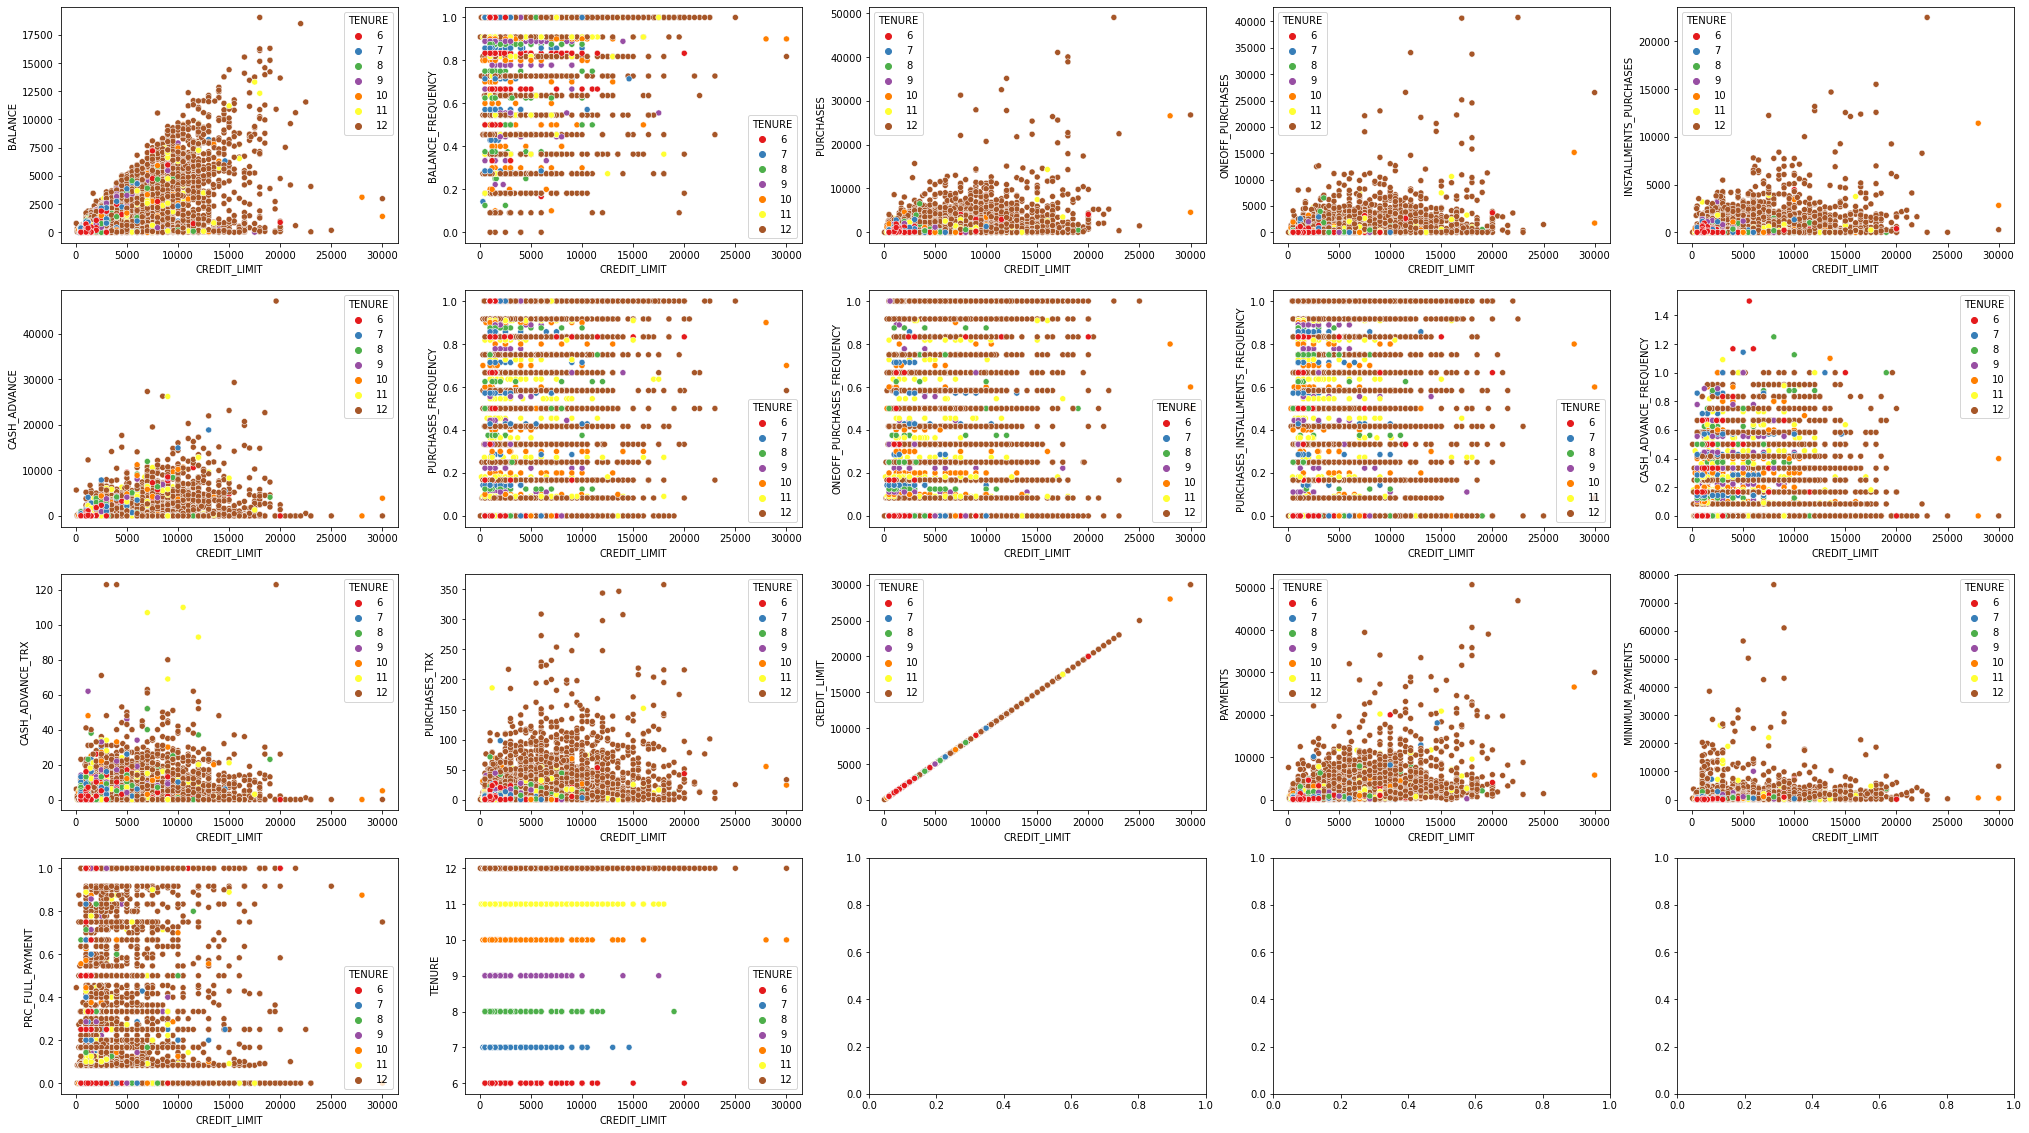

In [106]:
data2 = data.drop(['CUST_ID'],axis=1)
fig,axes=plt.subplots(nrows=4,ncols=5,figsize=(35,20))
i=0
j=0
for col in data2.columns:
    sns.scatterplot(data=data2, x='CREDIT_LIMIT',y=col,ax=axes[i][j], hue='TENURE', palette='Set1')
    #axes[i][j].legend()
    j+=1
    if j>4:
        i+=1
        j=0

It seems that column balance and credit_limit have a linear relationship.

Most of the CC holders have 12 months of tenure.

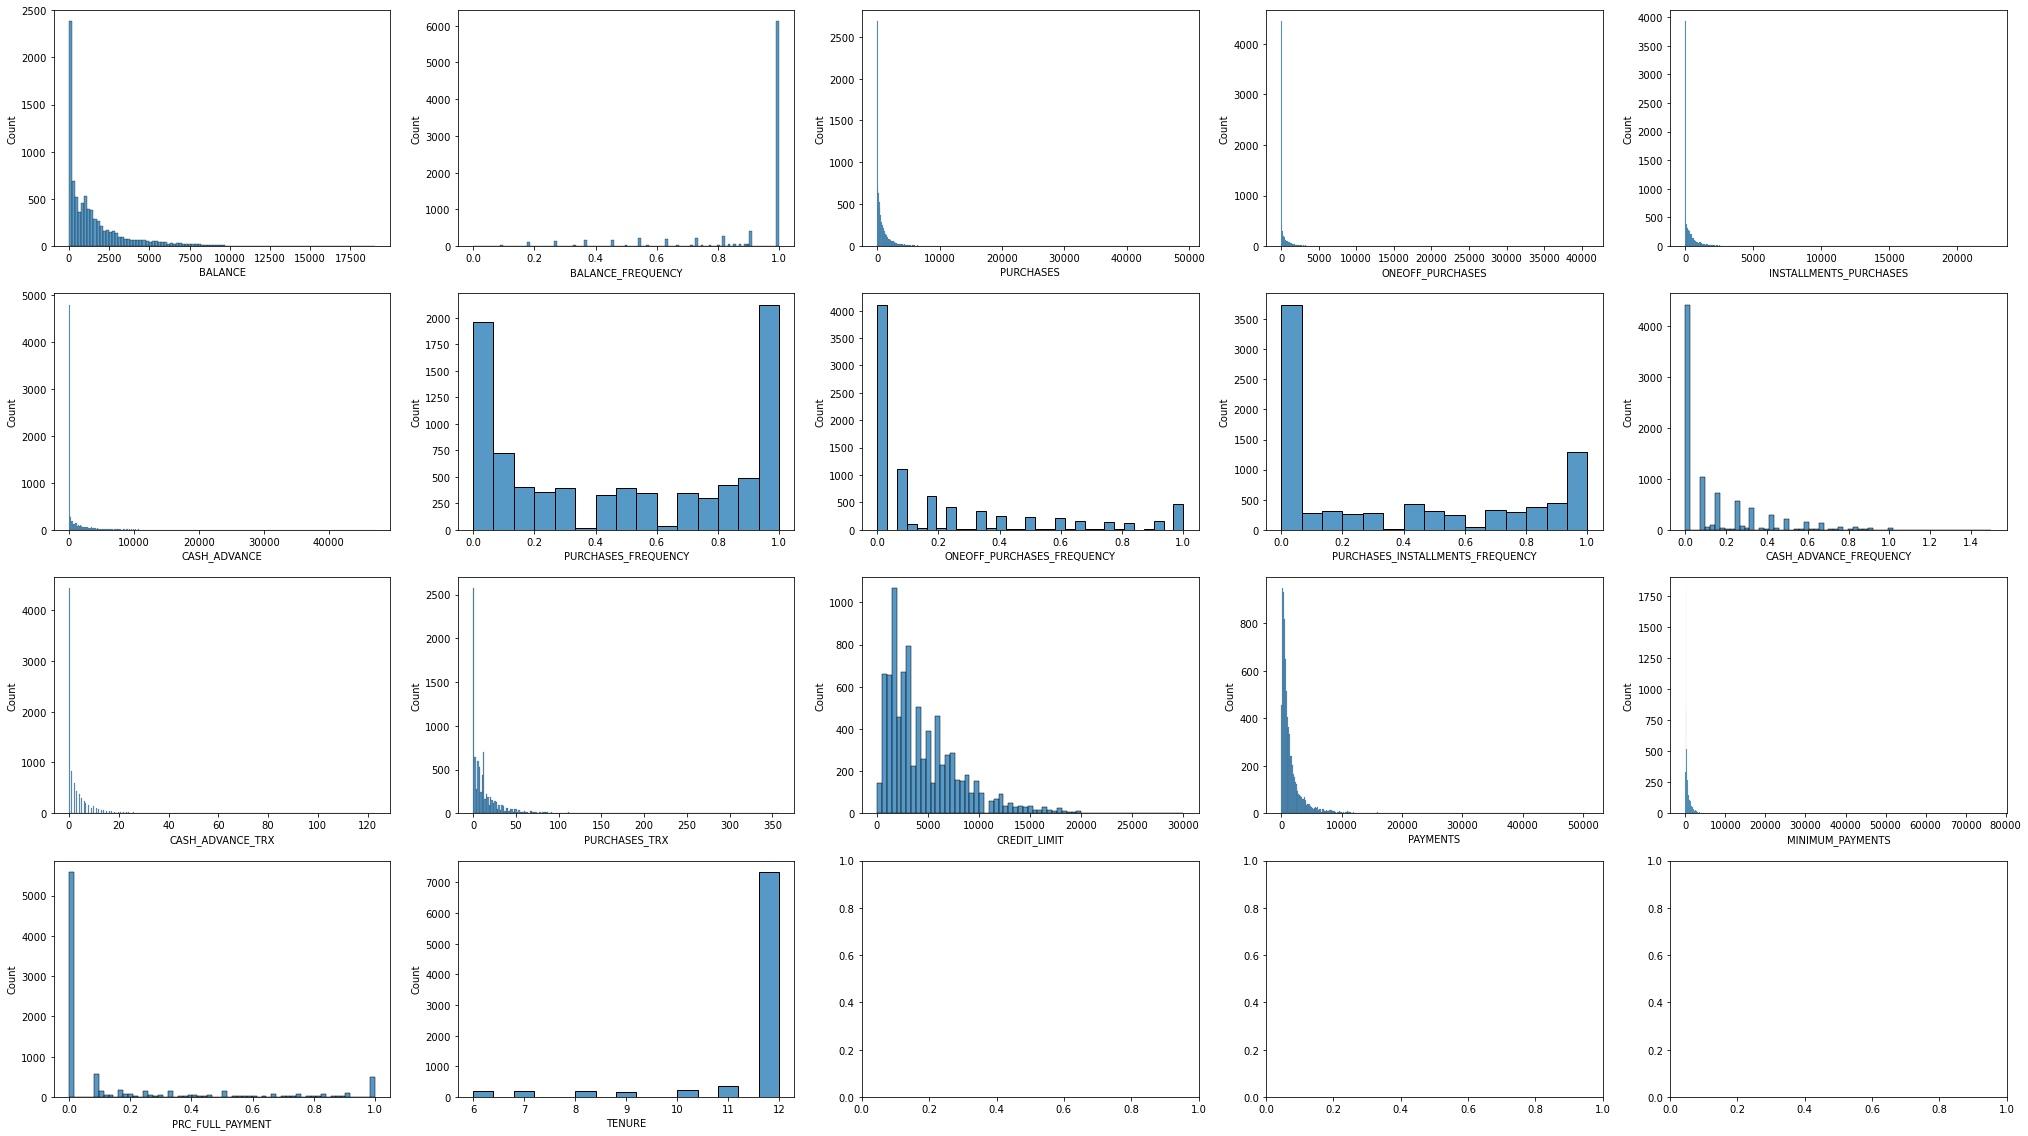

In [103]:
fig,axes=plt.subplots(nrows=4,ncols=5,figsize=(35,20))
i=0
j=0
for col in data2.columns:
    sns.histplot(data=data,x=col,ax=axes[i][j])
    #axes[i][j].legend()
    j+=1
    if j>4:
        i+=1
        j=0

Most if not all of the column have very skewed distribution. There are also signs of outliers.

---
# 5 - Data Preprocessing

## 5.1 - Handling outlier

In [15]:
# numerical columns in the dataset
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
print(num_cols)

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')


In [16]:
# skewness check 
for col in num_cols:
    print('column ',col, ' skewness is :', data[col].skew())

column  BALANCE  skewness is : 2.3742541668073507
column  BALANCE_FREQUENCY  skewness is : -2.0841614822186645
column  PURCHASES  skewness is : 8.055789007455493
column  ONEOFF_PURCHASES  skewness is : 9.935775932966443
column  INSTALLMENTS_PURCHASES  skewness is : 7.216133308729194
column  CASH_ADVANCE  skewness is : 5.13962856566708
column  PURCHASES_FREQUENCY  skewness is : 0.03304121629361683
column  ONEOFF_PURCHASES_FREQUENCY  skewness is : 1.5042342334651355
column  PURCHASES_INSTALLMENTS_FREQUENCY  skewness is : 0.48775295432449595
column  CASH_ADVANCE_FREQUENCY  skewness is : 1.7959150389505736
column  CASH_ADVANCE_TRX  skewness is : 5.673326830236882
column  PURCHASES_TRX  skewness is : 4.578418450576066
column  CREDIT_LIMIT  skewness is : 1.5070190408804254
column  PAYMENTS  skewness is : 5.873048586774976
column  MINIMUM_PAYMENTS  skewness is : 13.622193089492013
column  PRC_FULL_PAYMENT  skewness is : 1.8860271302192868
column  TENURE  skewness is : -3.011140522570408


In [17]:
# function to find outliers in skewed columns
def find_outliers_skew(df, cols):
    q1, q3 = np.percentile(df[cols], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return df[cols][(df[cols] < lower_bound) | (df[cols] > upper_bound)]

#function to find outliers in normal columns
def find_outliers_normal(df, cols):
    out1 = df[cols].mean() + 3*df[cols].std()
    out2 = df[cols].mean() - 3*df[cols].std()
    return df[cols][(df[cols] > out1) | (df[cols] < out2)]

In [18]:
# Outliers
# skewed columns
skewed_cols = num_cols.drop(['PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY'])
# normal columns
norm_cols = data[['PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY']].columns

for col in skewed_cols:
    percentage = find_outliers_skew(data, col).shape[0] / data.shape[0] * 100
    print(f'Percentage of outliers in {col} : ', percentage)

for col in norm_cols:
    percentage = find_outliers_normal(data, col).shape[0] / data.shape[0] * 100
    print(f'Percentage of outliers in {col} : ', percentage)

Percentage of outliers in BALANCE :  7.711903659101436
Percentage of outliers in BALANCE_FREQUENCY :  17.496526169522927
Percentage of outliers in PURCHASES :  8.89300602130616
Percentage of outliers in ONEOFF_PURCHASES :  11.127836961556275
Percentage of outliers in INSTALLMENTS_PURCHASES :  9.390921723019916
Percentage of outliers in CASH_ADVANCE :  11.313107920333486
Percentage of outliers in ONEOFF_PURCHASES_FREQUENCY :  8.67299675775822
Percentage of outliers in CASH_ADVANCE_FREQUENCY :  3.948587308939324
Percentage of outliers in CASH_ADVANCE_TRX :  9.19407132931913
Percentage of outliers in PURCHASES_TRX :  8.290875405280222
Percentage of outliers in CREDIT_LIMIT :  2.813802686428902
Percentage of outliers in PAYMENTS :  9.089856415006947
Percentage of outliers in MINIMUM_PAYMENTS :  9.738304770727188
Percentage of outliers in PRC_FULL_PAYMENT :  15.551181102362206
Percentage of outliers in TENURE :  14.93747105141269
Percentage of outliers in PURCHASES_FREQUENCY :  0.0
Percenta

Columns with < 5% of outliers are CASH_ADVANCE_FREQUENCY and CREDIT_LIMIT. We will remove the outliers in them.

In [19]:
# remove < 5% outliers
data['CASH_ADVANCE_FREQUENCY'] = data['CASH_ADVANCE_FREQUENCY'][~(data['CASH_ADVANCE_FREQUENCY'].isin(find_outliers_skew(data, 'CASH_ADVANCE_FREQUENCY')))]
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'][~(data['CREDIT_LIMIT'].isin(find_outliers_skew(data, 'CREDIT_LIMIT')))]

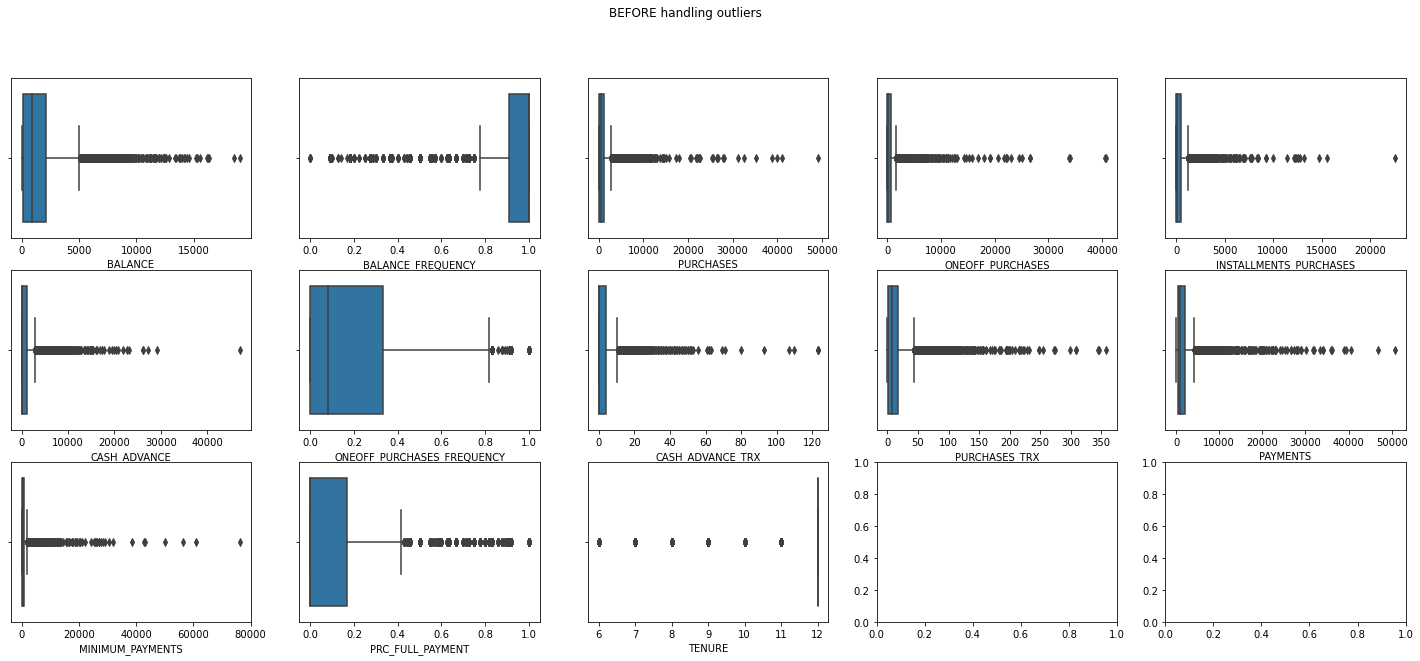

In [20]:
# checking outliers with boxplot
fig, ax = plt.subplots(3, 5, figsize=(25,10))
fig.suptitle('BEFORE handling outliers')
sns.boxplot(ax=ax[0, 0], x='BALANCE', data=data)
sns.boxplot(ax=ax[0, 1], x='BALANCE_FREQUENCY', data=data)
sns.boxplot(ax=ax[0, 2], x='PURCHASES', data=data)
sns.boxplot(ax=ax[0, 3], x='ONEOFF_PURCHASES', data=data)
sns.boxplot(ax=ax[0, 4], x='INSTALLMENTS_PURCHASES', data=data)
sns.boxplot(ax=ax[1, 0], x='CASH_ADVANCE', data=data)
sns.boxplot(ax=ax[1, 1], x='ONEOFF_PURCHASES_FREQUENCY', data=data)
sns.boxplot(ax=ax[1, 2], x='CASH_ADVANCE_TRX', data=data)
sns.boxplot(ax=ax[1, 3], x='PURCHASES_TRX', data=data)
sns.boxplot(ax=ax[1, 4], x='PAYMENTS', data=data)
sns.boxplot(ax=ax[2, 0], x='MINIMUM_PAYMENTS', data=data)
sns.boxplot(ax=ax[2, 1], x='PRC_FULL_PAYMENT', data=data)
sns.boxplot(ax=ax[2, 2], x='TENURE', data=data)
plt.show()

In [21]:
data.TENURE.value_counts()

12    7346
11     356
10     226
6      184
8      183
7      177
9      164
Name: TENURE, dtype: int64

Outliers in TENURE will be left as it is.

Winsorize the remaining columns.

In [22]:
# handling outliers with winsorize
data['BALANCE'] = winsorize(data['BALANCE'], limits=(0.1))
data['BALANCE_FREQUENCY'] = winsorize(data['BALANCE_FREQUENCY'], limits=(0.1))
data['PURCHASES'] = winsorize(data['PURCHASES'], limits=(0.1))
data['ONEOFF_PURCHASES'] = winsorize(data['ONEOFF_PURCHASES'], limits=(0.1))
data['INSTALLMENTS_PURCHASES'] = winsorize(data['INSTALLMENTS_PURCHASES'], limits=(0.1))
data['CASH_ADVANCE'] = winsorize(data['CASH_ADVANCE'], limits=(0.1))
data['ONEOFF_PURCHASES_FREQUENCY'] = winsorize(data['ONEOFF_PURCHASES_FREQUENCY'], limits=(0.1))
data['CASH_ADVANCE_TRX'] = winsorize(data['CASH_ADVANCE_TRX'], limits=(0.1))
data['PURCHASES_TRX'] = winsorize(data['PURCHASES_TRX'], limits=(0.1))
data['PAYMENTS'] = winsorize(data['PAYMENTS'], limits=(0.1))
data['MINIMUM_PAYMENTS'] = winsorize(data['MINIMUM_PAYMENTS'], limits=(0.1))
data['PRC_FULL_PAYMENT'] = winsorize(data['PRC_FULL_PAYMENT'], limits=(0.1))

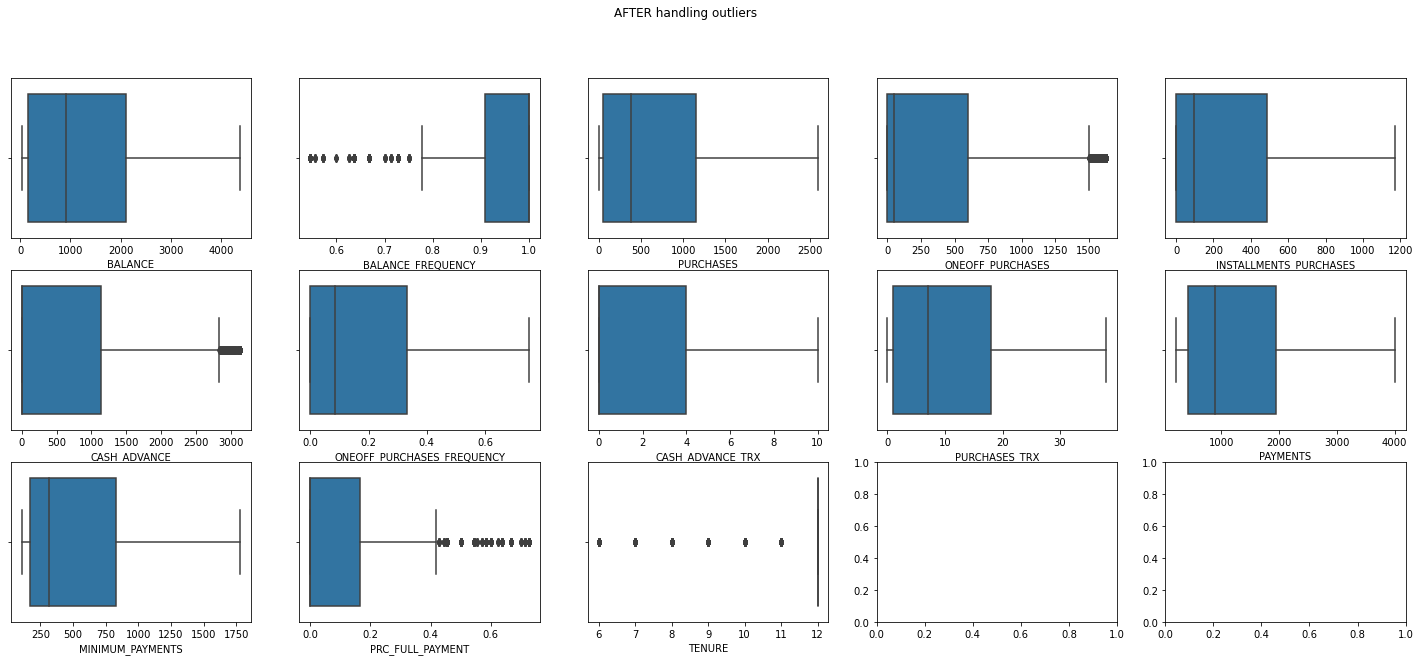

In [23]:
# Boxplot after handling outliers
fig, ax = plt.subplots(3, 5, figsize=(25,10))
fig.suptitle('AFTER handling outliers')
sns.boxplot(ax=ax[0, 0], x='BALANCE', data=data)
sns.boxplot(ax=ax[0, 1], x='BALANCE_FREQUENCY', data=data)
sns.boxplot(ax=ax[0, 2], x='PURCHASES', data=data)
sns.boxplot(ax=ax[0, 3], x='ONEOFF_PURCHASES', data=data)
sns.boxplot(ax=ax[0, 4], x='INSTALLMENTS_PURCHASES', data=data)
sns.boxplot(ax=ax[1, 0], x='CASH_ADVANCE', data=data)
sns.boxplot(ax=ax[1, 1], x='ONEOFF_PURCHASES_FREQUENCY', data=data)
sns.boxplot(ax=ax[1, 2], x='CASH_ADVANCE_TRX', data=data)
sns.boxplot(ax=ax[1, 3], x='PURCHASES_TRX', data=data)
sns.boxplot(ax=ax[1, 4], x='PAYMENTS', data=data)
sns.boxplot(ax=ax[2, 0], x='MINIMUM_PAYMENTS', data=data)
sns.boxplot(ax=ax[2, 1], x='PRC_FULL_PAYMENT', data=data)
sns.boxplot(ax=ax[2, 2], x='TENURE', data=data)
plt.show()

## 5.4 - Handling Missing Values

In [24]:
print('Number of missing values : ', data.isnull().sum().sum())

Number of missing values :  584


In [25]:
data.isnull().sum().sort_values(ascending=False)

CASH_ADVANCE_FREQUENCY              341
CREDIT_LIMIT                        243
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
MINIMUM_PAYMENTS                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [26]:
mis_col = ['CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT']

# percentage of missing values
for col in mis_col:
    percentage = data[col].isnull().sum() / data.shape[0] * 100
    print(f'Percentage of missing values in {col} : ', percentage, '%')

Percentage of missing values in CASH_ADVANCE_FREQUENCY :  3.948587308939324 %
Percentage of missing values in CREDIT_LIMIT :  2.813802686428902 %


We will remove the missing values since they are less than 5% of the data and we assume that the mechanism of missing data is MCAR.

In [27]:
# remove missing values
data = data.dropna()

In [28]:
print('Number of missing values : ', data.isnull().sum().sum())

Number of missing values :  0


## 5.5 - Scaling

In [29]:
data = data.drop(['CUST_ID'], axis=1)

In [30]:
# Scaling using StandardScaler
scaler = StandardScaler()

data_scaled = scaler.fit_transform(data)

In [31]:
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

In [32]:
data_scaled.shape

(8070, 17)

In [33]:
data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.908958,-0.582591,-0.745342,-0.670955,-0.516394,-0.624489,-0.829351,-0.721106,-0.724344,-0.715946,-0.671746,-0.766129,-1.029262,-0.923062,-0.766610,-0.574457,0.350449
1,1.428618,-0.010806,-0.858103,-0.670955,-0.758265,2.478154,-1.245773,-0.721106,-0.933524,0.895458,0.600862,-0.928121,0.970546,2.296463,0.998033,0.332523,0.350449
2,0.905646,0.560978,0.055774,0.737264,-0.758265,-0.624489,1.252756,2.232578,-0.933524,-0.715946,-0.671746,0.043830,1.137196,-0.576973,0.156118,-0.574457,0.350449
3,-0.334603,0.560978,-0.839191,-0.641813,-0.758265,-0.624489,-1.037563,-0.392920,-0.933524,-0.715946,-0.671746,-0.847125,-0.962601,-0.529162,-0.567448,-0.574457,0.350449
4,0.398939,0.560978,0.717817,-0.670955,2.208083,-0.624489,0.419913,-0.721106,0.530737,-0.715946,-0.671746,-0.280153,-0.762621,0.084084,2.338799,-0.574457,0.350449


## 5.6 - VIF

In [34]:
vif = pd.DataFrame()
vif['feature'] = data_scaled.columns

# menghitung nilai VIF dari setiap feature
vif['VIF'] = [variance_inflation_factor(data_scaled, i) for i in range(len(data_scaled.columns))]

vif

,feature,VIF
0,BALANCE,5.062575
1,BALANCE_FREQUENCY,1.424635
2,PURCHASES,17.972209
3,ONEOFF_PURCHASES,11.802328
4,INSTALLMENTS_PURCHASES,7.979742
5,CASH_ADVANCE,3.287235
6,PURCHASES_FREQUENCY,11.117263
7,ONEOFF_PURCHASES_FREQUENCY,6.458011
8,PURCHASES_INSTALLMENTS_FREQUENCY,12.372347
9,CASH_ADVANCE_FREQUENCY,6.716920


In [35]:
# column with vif > 5
vif_col = vif[vif['VIF'] > 5].sort_values(by='VIF')
print('Total number of feature with vif > 5 : ',vif_col.shape[0])
vif_col

Total number of feature with vif > 5 :  10


,feature,VIF
0,BALANCE,5.062575
7,ONEOFF_PURCHASES_FREQUENCY,6.458011
11,PURCHASES_TRX,6.516012
9,CASH_ADVANCE_FREQUENCY,6.716920
10,CASH_ADVANCE_TRX,7.387842
4,INSTALLMENTS_PURCHASES,7.979742
6,PURCHASES_FREQUENCY,11.117263
3,ONEOFF_PURCHASES,11.802328
8,PURCHASES_INSTALLMENTS_FREQUENCY,12.372347
2,PURCHASES,17.972209


VIF > 5 indicates that the variables are highly correlated. From above result, we can expect that the data can be reduced to 10 features. 

However, we will just take this information with a grain of salt. The real number of features after reduction is based on PCA.

## 5.6 - PCA

In [36]:
pca = PCA()
pca.fit(data_scaled)

PCA()

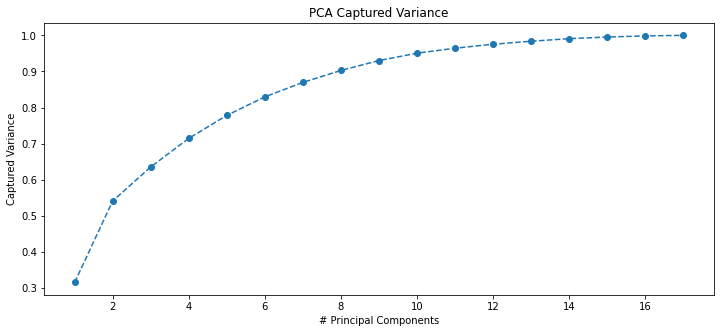

In [37]:
plt.figure(figsize=(12,5))
plt.plot(range(1, 18), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--', )
plt.title('PCA Captured Variance')
plt.xlabel('# Principal Components')
plt.ylabel('Captured Variance')
plt.show()

In order to capture about 90% of the variance, we will use 8 number of principal components.

In [38]:
#so now we'll run PCA with our chosen number of principal components:
pca8 = PCA(n_components=8)
pca8.fit(data_scaled)

PCA(n_components=8)

In [39]:
pca8.explained_variance_ratio_

array([0.31506006, 0.22589073, 0.0942183 , 0.07931309, 0.0637192 ,
       0.05133533, 0.04003081, 0.03316952])

The first component contains the most variance with 31.50% of the total variance. The second component has 22.58%, and so on as per above.

In [40]:
pca8_scores = pca8.transform(data_scaled)
pca8_scores

array([[-1.55398853, -2.30881785,  0.22065425, ..., -0.3078276 ,
        -0.6499312 ,  0.03602737],
       [-2.45326252,  2.82208702,  0.48235941, ...,  0.2538897 ,
         0.34940668, -1.18593617],
       [ 1.15747484,  0.53394242,  1.57611636, ...,  0.4282591 ,
         1.14938396,  0.96195992],
       ...,
       [-0.46753843, -2.78887146, -0.98809441, ...,  2.69124699,
         0.58034413, -0.59372551],
       [-2.49137976, -2.25201183,  0.32843629, ...,  2.13048965,
         0.51047213, -1.05724952],
       [ 0.16491361, -0.68977507,  2.0596968 , ...,  2.01780911,
        -0.64019773,  0.64262407]])

In [41]:
pca8_scores_df = pd.DataFrame(pca8_scores, columns=['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7', 'Component 8'])

In [42]:
pca8_scores_df

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8
0,-1.553989,-2.308818,0.220654,-0.772877,-0.075181,-0.307828,-0.649931,0.036027
1,-2.453263,2.822087,0.482359,0.890873,-1.980483,0.253890,0.349407,-1.185936
2,1.157475,0.533942,1.576116,-1.957791,0.639191,0.428259,1.149384,0.961960
3,-1.626901,-1.587355,0.298503,-1.382495,0.164464,-0.506498,0.048139,-0.581039
4,1.007763,0.381948,-2.219512,-1.405164,-0.582361,0.777043,-1.153341,-1.450265
...,...,...,...,...,...,...,...,...
8065,-2.040816,-2.958202,1.046692,1.448507,2.342605,3.189672,-0.924939,-0.289385
8066,0.299435,-2.677447,-1.601988,1.956987,2.558717,2.280593,1.606066,-1.175748
8067,-0.467538,-2.788871,-0.988094,1.696025,2.524826,2.691247,0.580344,-0.593726
8068,-2.491380,-2.252012,0.328436,1.835004,2.642622,2.130490,0.510472,-1.057250


#### Data visualization before PCA 8 components:

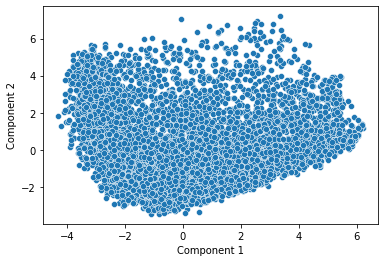

In [43]:
# reduce the dimensionality to 2 in order to visualize the data
pca2d = PCA(n_components=2).fit(data_scaled)
data_2d = pca2d.transform(data_scaled)

sns.scatterplot(x=data_2d[:,0],y=data_2d[:,1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

The dataset is very dense and there seems to be no clear sign of clusters.

---
# 6 - Clustering

## 6.1 - Dendrogram checking

In [44]:
hier_cluster = linkage(data_scaled, method='ward')

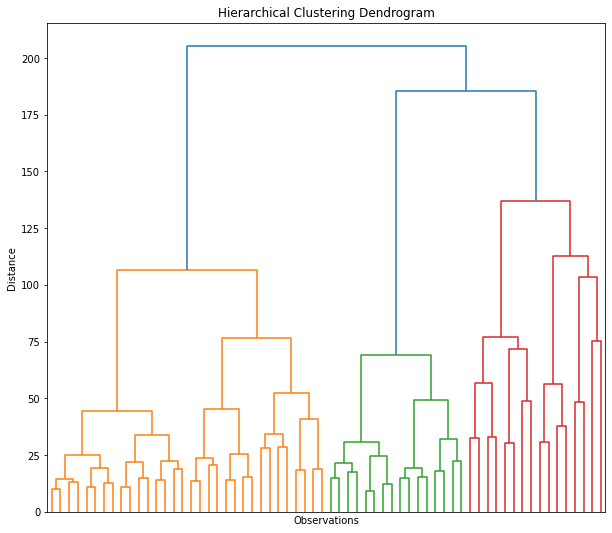

In [45]:
plt.figure(figsize=(10,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_cluster, truncate_mode='level', p = 5, show_leaf_counts=False, no_labels=True)
plt.show()

Based on our dendrogram, there are number of choices to clusters our data. It can be 3 or 4. If we draw a horizontal line at distance 125, we can get 4 clusters.

## 6.2 - K-Means Clustering

### 6.2.1 - Without PCA

finding the optimal number of clusters for K-means by calculating WCSS (within cluster sum of squares)

In [46]:
wcss = []
for i in range(1, 17):
    km_no_pca = KMeans(n_clusters=i, init='k-means++', random_state=69)
    km_no_pca.fit(data_scaled)
    wcss.append(km_no_pca.inertia_)

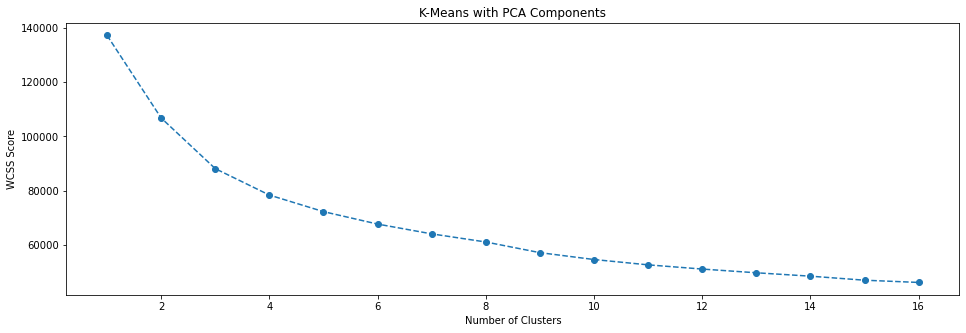

In [47]:
plt.figure(figsize=(16,5))
plt.plot(range(1, 17), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Score')
plt.title('K-Means with PCA Components')
plt.show()

The elbow is not really distinguishable. Intuitively, and supported by our dendrogram, we will use 4 clusters.

In [48]:
km4 = KMeans(n_clusters=4, init='k-means++', random_state=3)
km4.fit(data_scaled)

KMeans(n_clusters=4, random_state=3)

In [49]:
km9 = KMeans(n_clusters=9, init='k-means++', random_state=42)
km9.fit(data_scaled)

KMeans(n_clusters=9, random_state=42)

In [50]:
data_km4 = data.copy()
data_km4['K-Means Cluster'] = km4.labels_

In [51]:
data_km4_mean = data_km4.groupby('K-Means Cluster').mean()

In [52]:
data_km4_mean.T

K-Means Cluster,0,1,2,3
BALANCE,773.842757,504.299555,2711.697057,1670.026370
BALANCE_FREQUENCY,0.841603,0.928754,0.954975,0.975949
PURCHASES,270.562810,729.895146,256.610158,2129.249980
ONEOFF_PURCHASES,209.837180,102.987435,145.154546,1266.766008
INSTALLMENTS_PURCHASES,57.071040,556.844587,97.969549,661.729980
CASH_ADVANCE,296.747987,94.274288,2109.446499,368.901849
PURCHASES_FREQUENCY,0.212519,0.876527,0.206761,0.891559
ONEOFF_PURCHASES_FREQUENCY,0.114829,0.076864,0.080018,0.567144
PURCHASES_INSTALLMENTS_FREQUENCY,0.091353,0.810775,0.129505,0.621350
CASH_ADVANCE_FREQUENCY,0.072145,0.023916,0.329450,0.062811


We can try to give names to the clusters based on above table. 
* It looks like cluster 0 contains CC holders with the least number of transactions. --> non-frequent buyers
* cluster 1 contains CC holders with high number of non in-advance transactions. --> normal buyers
* cluster 2 contains CC holders with the most number of in-advance transaction. --> in-advance buyers
* cluster 3 contains CC holders who have the most number of transactions. --> frequent buyers

In [53]:
data_km4_mean.rename({0:'Non-frequent Buyers', 1:'Normal Buyers', 2:'In-Advance Buyers', 3:'Frequent Payers'})

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
K-Means Cluster,,,,,,,,,,,,,,,,,
Non-frequent Buyers,773.842757,0.841603,270.562810,209.837180,57.071040,296.747987,0.212519,0.114829,0.091353,0.072145,1.137618,3.502355,3005.691097,774.025187,357.596364,0.085990,11.518843
Normal Buyers,504.299555,0.928754,729.895146,102.987435,556.844587,94.274288,0.876527,0.076864,0.810775,0.023916,0.417650,15.845562,3069.374634,852.064777,381.101952,0.269505,11.447922
In-Advance Buyers,2711.697057,0.954975,256.610158,145.154546,97.969549,2109.446499,0.206761,0.080018,0.129505,0.329450,6.708714,4.022547,5309.275571,1741.878552,1002.891280,0.031731,11.439366
Frequent Payers,1670.026370,0.975949,2129.249980,1266.766008,661.729980,368.901849,0.891559,0.567144,0.621350,0.062811,1.216844,29.562334,6209.006511,2440.567937,626.592889,0.200895,11.861406


In [54]:
data_km4['Labels'] = data_km4['K-Means Cluster'].map({0:'Non-frequent Buyers', 1:'Normal Buyers', 2:'In-Advance Buyers', 3:'Frequent Payers'})

In [55]:
data_km4.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,K-Means Cluster,Labels
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,214.758351,139.509787,0.000000,12,0,Non-frequent Buyers
1,3202.467416,0.909091,0.00,0.00,0.0,3129.703318,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4003.782858,1072.340217,0.222222,12,2,In-Advance Buyers
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,0.750000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,3,Frequent Payers
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,0,Non-frequent Buyers
5,1809.828751,1.000000,1333.28,0.00,1170.0,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,1781.099062,0.000000,12,1,Normal Buyers


#### 6.2.1.1 - Visualization

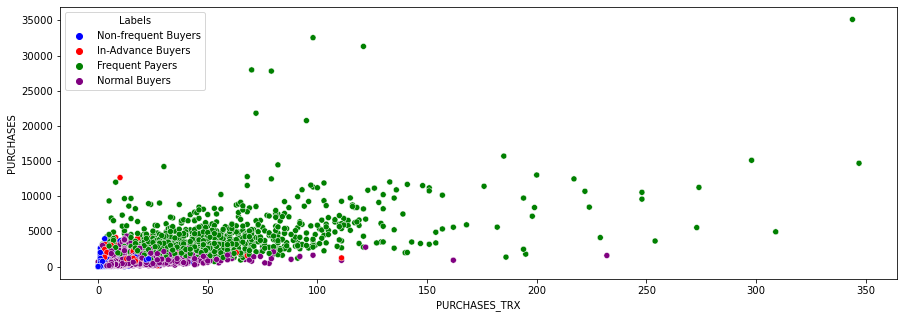

In [56]:
plt.figure(figsize=(15,5))
X = data1['PURCHASES_TRX']
Y = data1['PURCHASES']
g = sns.scatterplot(X, Y, hue = data_km4['Labels'], palette = ['blue', 'red', 'green', 'purple'])
plt.show()

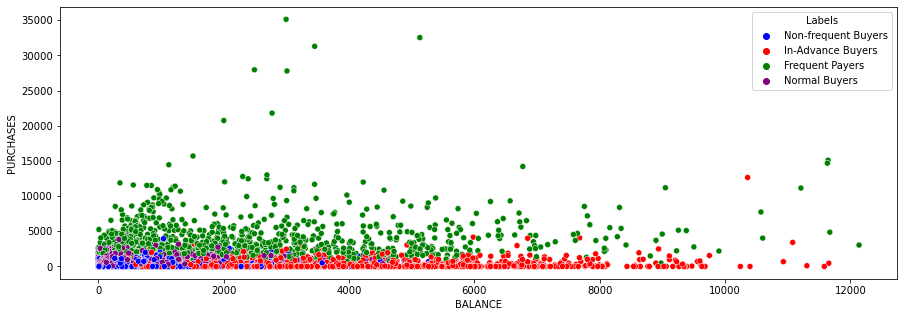

In [57]:
plt.figure(figsize=(15,5))
X = data1['BALANCE']
Y = data1['PURCHASES']
g = sns.scatterplot(X, Y, hue = data_km4['Labels'], palette = ['blue', 'red', 'green', 'purple'])
plt.show()

### 6.2.2 - With PCA

finding the optimal number of clusters for K-means by calculating WCSS (within cluster sum of squares)

In [58]:
wcss = []
for i in range(1, 17):
    km_pca = KMeans(n_clusters=i, init='k-means++', random_state=69)
    km_pca.fit(pca8_scores)
    wcss.append(km_pca.inertia_)

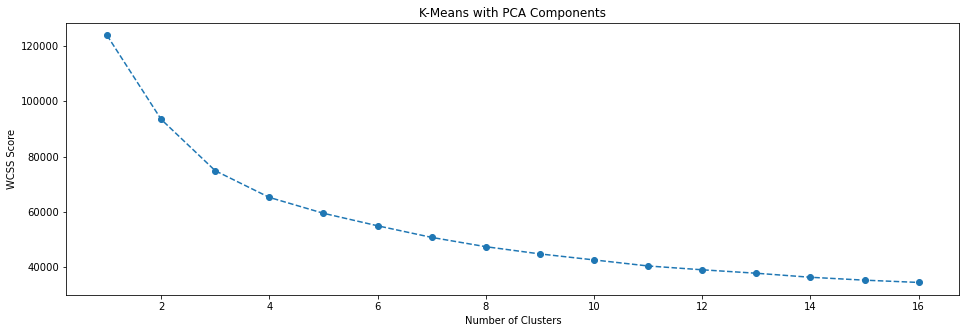

In [59]:
plt.figure(figsize=(16,5))
plt.plot(range(1, 17), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Score')
plt.title('K-Means with PCA Components')
plt.show()

Again, we will choose 4 clusters.

In [60]:
km4_pca = KMeans(n_clusters=4, init='k-means++', random_state=69)
km4_pca.fit(pca8_scores)

KMeans(n_clusters=4, random_state=69)

In [61]:
data_km4_pca = pd.concat([data.reset_index(drop=True), pd.DataFrame(pca8_scores)], axis=1)
data_km4_pca.columns.values[-8:] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7', 'Component 8']

data_km4_pca['K-Means PCA Cluster'] = km4_pca.labels_
data_km4_pca.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,TENURE,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,K-Means PCA Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.00,...,12,-1.553989,-2.308818,0.220654,-0.772877,-0.075181,-0.307828,-0.649931,0.036027,1
1,3202.467416,0.909091,0.00,0.00,0.0,3129.703318,0.000000,0.000000,0.000000,0.25,...,12,-2.453263,2.822087,0.482359,0.890873,-1.980483,0.253890,0.349407,-1.185936,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,0.750000,0.000000,0.00,...,12,1.157475,0.533942,1.576116,-1.957791,0.639191,0.428259,1.149384,0.961960,3
3,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.00,...,12,-1.626901,-1.587355,0.298503,-1.382495,0.164464,-0.506498,0.048139,-0.581039,1
4,1809.828751,1.000000,1333.28,0.00,1170.0,0.000000,0.666667,0.000000,0.583333,0.00,...,12,1.007763,0.381948,-2.219512,-1.405164,-0.582361,0.777043,-1.153341,-1.450265,2


In [62]:
data_km4_pca_only_kmeans = data_km4_pca[['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6','Component 7','Component 8', 'K-Means PCA Cluster']]
data_km4_pca_only_kmeans.head()

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,K-Means PCA Cluster
0,-1.553989,-2.308818,0.220654,-0.772877,-0.075181,-0.307828,-0.649931,0.036027,1
1,-2.453263,2.822087,0.482359,0.890873,-1.980483,0.253890,0.349407,-1.185936,0
2,1.157475,0.533942,1.576116,-1.957791,0.639191,0.428259,1.149384,0.961960,3
3,-1.626901,-1.587355,0.298503,-1.382495,0.164464,-0.506498,0.048139,-0.581039,1
4,1.007763,0.381948,-2.219512,-1.405164,-0.582361,0.777043,-1.153341,-1.450265,2


In [63]:
data_km4_pca_mean = data_km4_pca.groupby('K-Means PCA Cluster').mean()

In [64]:
data_km4_pca_mean.T

K-Means PCA Cluster,0,1,2,3
BALANCE,2708.475801,770.983498,506.923250,1665.434016
BALANCE_FREQUENCY,0.956122,0.840699,0.928674,0.976000
PURCHASES,255.560991,269.260576,733.241112,2121.916244
ONEOFF_PURCHASES,144.376395,209.672575,101.685203,1264.467531
INSTALLMENTS_PURCHASES,97.731325,55.927253,561.059058,657.901076
CASH_ADVANCE,2099.544399,299.271408,94.341620,368.704112
PURCHASES_FREQUENCY,0.205651,0.213595,0.875522,0.891455
ONEOFF_PURCHASES_FREQUENCY,0.079367,0.115163,0.074571,0.567989
PURCHASES_INSTALLMENTS_FREQUENCY,0.129190,0.092081,0.812187,0.618755
CASH_ADVANCE_FREQUENCY,0.329974,0.071420,0.023947,0.062796


In [65]:
data_km4_pca_mean['Obs.'] = data_km4_pca[['K-Means PCA Cluster', 'BALANCE']].groupby(['K-Means PCA Cluster']).count()
data_km4_pca_mean['Obs. Prop.'] = data_km4_pca_mean['Obs.'] / data_km4_pca_mean['Obs.'].sum()
data_km4_pca_mean = data_km4_pca_mean.rename({0:'Non-frequent Buyers', 1:'Normal Buyers', 2:'In-Advance Buyers', 3:'Frequent Buyers'})
data_km4_pca_mean

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Obs.,Obs. Prop.
K-Means PCA Cluster,,,,,,,,,,,,,,,,,,,,,
Non-frequent Buyers,2708.475801,0.956122,255.560991,144.376395,97.731325,2099.544399,0.205651,0.079367,0.129190,0.329974,...,-2.236458,2.361586,-0.219449,0.468183,-0.088542,-0.087001,0.156768,0.029197,1645,0.203841
Normal Buyers,770.983498,0.840699,269.260576,209.672575,55.927253,299.271408,0.213595,0.115163,0.092081,0.071420,...,-1.262302,-1.120235,0.573898,-0.361876,-0.027754,0.044074,-0.152670,-0.031280,2967,0.367658
In-Advance Buyers,506.923250,0.928674,733.241112,101.685203,561.059058,94.341620,0.875522,0.074571,0.812187,0.023947,...,1.163913,-1.298302,-1.339494,0.208973,-0.066693,0.035440,0.161707,0.029311,1943,0.240768
Frequent Buyers,1665.434016,0.976000,2121.916244,1264.467531,657.901076,368.704112,0.891455,0.567989,0.618755,0.062796,...,3.407750,1.294740,0.832261,-0.067662,0.236027,-0.037301,-0.078619,-0.008035,1515,0.187732


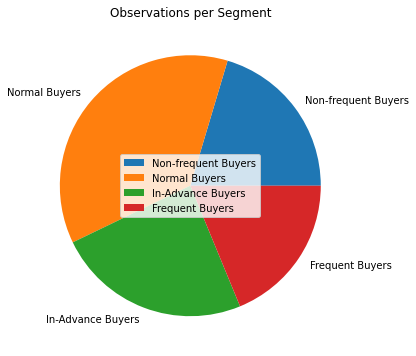

In [66]:
data_km4_pca_mean.plot.pie(y='Obs.', figsize=(6, 6))
plt.legend(loc='center')
plt.ylabel(None, loc='center')
plt.title('Observations per Segment')
plt.show()

From above pie chart, we can see that normal buyers is the biggest cluster. The rest are relatively in similar size.

#### 6.2.2.1 - Visualization

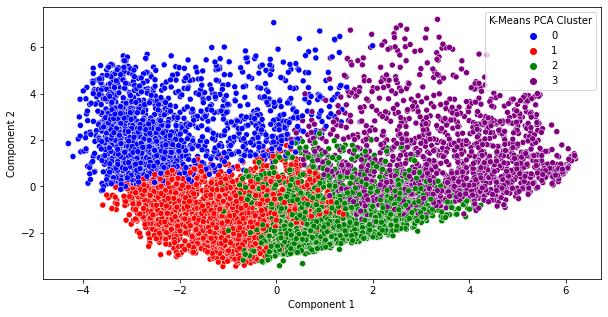

In [67]:
# visualization with the highest 2 principal components
plt.figure(figsize=(10,5))
sns.scatterplot(data=data_km4_pca, x='Component 1', y='Component 2', hue='K-Means PCA Cluster', palette = ['blue', 'red', 'green', 'purple'])
plt.show()

The 4 clusters are distinguishable eventhough there are some overlapping data points that can be seen.

In line with our pie chart, the size of the clusters is quite similar.

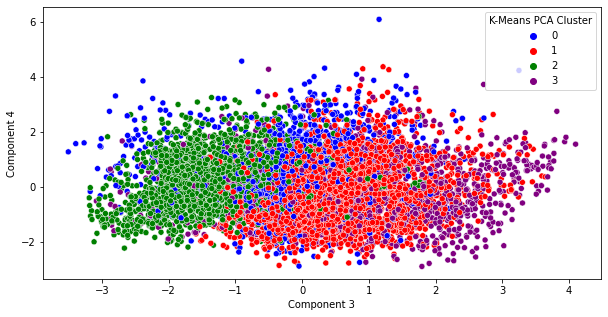

In [68]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data_km4_pca, x='Component 3', y='Component 4', hue='K-Means PCA Cluster', palette = ['blue', 'red', 'green', 'purple'])
plt.show()

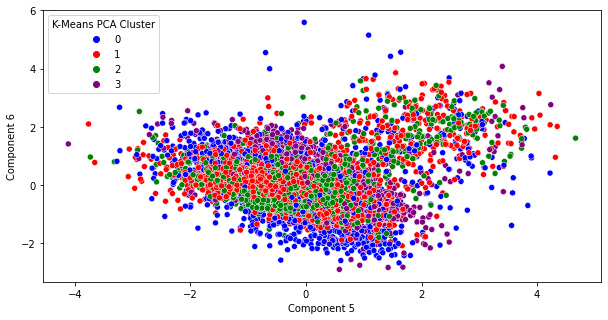

In [69]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data_km4_pca, x='Component 5', y='Component 6', hue='K-Means PCA Cluster', palette = ['blue', 'red', 'green', 'purple'])
plt.show()

The clusters in data visualizations with lower principal components are not well represented, compared to the first visualization. It is because the components used are carrying less information of the data. 

## 6.3 - Gaussian Mixture Model

In [70]:
gm5 = GaussianMixture(n_components=5, n_init=10, random_state=42, covariance_type='tied')
gm5.fit(pca8_scores)

GaussianMixture(covariance_type='tied', n_components=5, n_init=10,
                random_state=42)

In [71]:
print('weights : ',gm5.weights_)
print('Converge achieved? ',gm5.converged_)
print('Number iteration to achieve converge : ',gm5.n_iter_)

weights :  [0.02812347 0.55561292 0.14958831 0.18771461 0.0789607 ]
Converge achieved?  True
Number iteration to achieve converge :  18


In [72]:
# Predict as `Hard Clustering`
gm5_label = gm5.predict(pca8_scores)
gm5_label

array([1, 2, 3, ..., 4, 4, 4], dtype=int64)

<AxesSubplot:>

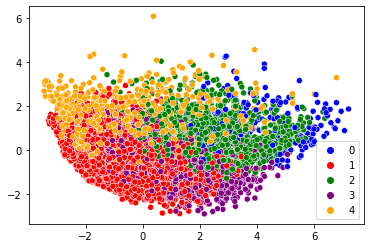

In [73]:
#Gaussian Mixture
sns.scatterplot(x=pca8_scores[:,1],y=pca8_scores[:,3],hue=gm5_label, palette=['blue', 'red', 'green', 'purple', 'orange'])

In [74]:
gm2 = GaussianMixture(n_components=2, n_init=10, random_state=42, covariance_type='tied')
gm2.fit(pca8_scores)

GaussianMixture(covariance_type='tied', n_components=2, n_init=10,
                random_state=42)

In [75]:
print('weights : ',gm2.weights_)
print('Converge achieved? ',gm2.converged_)
print('Number iteration to achieve converge : ',gm2.n_iter_)

weights :  [0.61715809 0.38284191]
Converge achieved?  True
Number iteration to achieve converge :  10


In [76]:
gm2_label = gm2.predict(pca8_scores)
gm2_label

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

<AxesSubplot:>

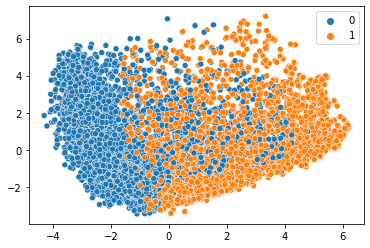

In [77]:
#Gaussian Mixture
sns.scatterplot(x=pca8_scores[:,0],y=pca8_scores[:,1],hue=gm2_label)

In [78]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    #plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)

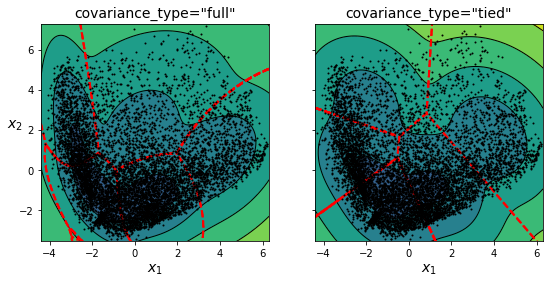

In [79]:
gm1=GaussianMixture(n_components=5,covariance_type='full').fit(data_2d)
gm2=GaussianMixture(n_components=5,covariance_type='tied').fit(data_2d)
compare_gaussian_mixtures(gm1,gm2,data_2d)

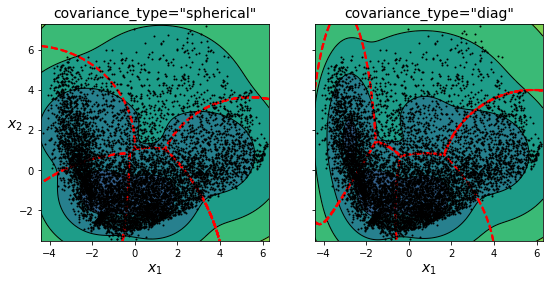

In [80]:
gm1=GaussianMixture(n_components=5,covariance_type='spherical').fit(data_2d)
gm2=GaussianMixture(n_components=5,covariance_type='diag').fit(data_2d)
compare_gaussian_mixtures(gm1,gm2,data_2d)

In [81]:
print('aic score : ',gm5.aic(pca8_scores))
print('bic score : ',gm5.bic(pca8_scores))

aic score :  187889.15342300123
bic score :  188448.82612390234


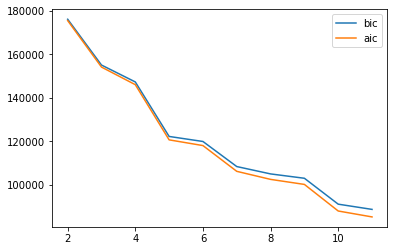

In [82]:
n_gauss=[2,3,4,5,6,7,8,9,10,11]
bic=[]
aic=[]
for g in n_gauss:
    gm=GaussianMixture(n_components=g,covariance_type='full').fit(pca8_scores)
    bic.append(gm.bic(pca8_scores))
    aic.append(gm.aic(pca8_scores))

plt.plot(n_gauss,bic,label='bic')
plt.plot(n_gauss,aic,label='aic')
plt.legend()
plt.show()

In [83]:
gm=GaussianMixture(n_components=8,covariance_type='diag').fit(pca8_scores)
print(gm.aic(pca8_scores))

177611.41487477315


## 6.4 - Agglomerative Clustering

In [84]:
ac = AC(linkage='ward').fit(pca8_scores)

<AxesSubplot:>

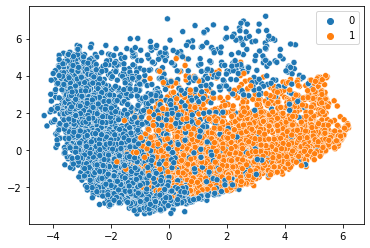

In [85]:
sns.scatterplot(x=pca8_scores[:,0],y=pca8_scores[:,1],hue=ac.labels_)

## 6.5 - Spectral Clustering

In [86]:
scl = SC(n_clusters=2, gamma=0.01)
scl.fit(pca8_scores)

SpectralClustering(gamma=0.01, n_clusters=2)

<AxesSubplot:>

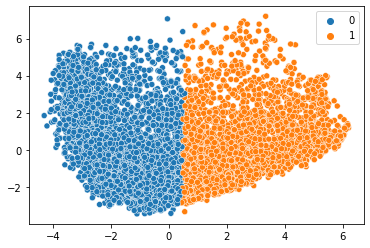

In [87]:
sns.scatterplot(x=pca8_scores[:,0],y=pca8_scores[:,1],hue=scl.labels_)

---
# 7 - Conclusions

The CC holder dataset used in this project has 8950 rows and 10 columns.

For our modeling: the outliers were handled by removal and winsorizing, missing values were dropped, and the data was scaled with StandardScaler

As per multicollinearity check (VIF), there are 10 highly correlated features.

The dimensionality reduction is done using PCA with 8 components, to retain about 90% of the data variance.

Clustering with K-Means were done with 4 clusters. The choice of number of clusters is based on the dendrogram and elbow method.

The 4 clusters were named as Non-Frequent Buyers, Normal Buyers, In-Advance Buyers, and Frequent Buyers.

Clustering with the other 3 methods were also done. The methods were: Gaussian Mixture Model, Agglomerative Clustering, and Spectral Clustering. Among these 3 methods, Spectral Clustering gave the most distinct clusters when the data was visualized by the first 2 highest principal components.